In [1]:
import pandas as pd
import numpy as np
import torch
import os
from tqdm import tqdm
import sys
sys.path.append("../../")
import biked_commons

from biked_commons.prediction import loaders, evaluators, prepare
from biked_commons.resource_utils import resource_path, split_datasets_path

In [2]:
prepare.prepare_bike_bench()

Removed 10 outliers from the dataset.


In [ ]:
synthetic_data_path = resource_path("synthetic_data_rendering")

In [ ]:
embeddings_path = os.path.join(synthetic_data_path, "embeddings")
designs_path = os.path.join(synthetic_data_path, "designs")

In [ ]:
all_embeddings = []
all_designs = []
for i in range(31):
    embedding = pd.read_csv(os.path.join(embeddings_path, f"{i}.csv"), index_col=0)
    design = pd.read_csv(os.path.join(designs_path, f"{i}.csv"), index_col=0)
    


    all_embeddings.append(embedding)
    all_designs.append(design)

all_embeddings = pd.concat(all_embeddings)
all_designs = pd.concat(all_designs)

In [ ]:



# if any of embedding's indices are not in design's indices, we need to drop from design
all_designs = all_designs.loc[all_designs.index.isin(all_embeddings.index)]

display(all_embeddings)
display(all_designs)

#convert all_embeddings to float32 torch tensor
all_embeddings_np = all_embeddings.values.astype(np.float32)
#save all embeddings to disk
np.save(split_datasets_path("CLIP_Y_train.npy"), all_embeddings_np)


#save all designs to csv
all_designs.to_csv(split_datasets_path("CLIP_X_train.csv"))

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
851aea84-3a68-447d-abbb-91f547c0080c,-0.210787,-0.209032,-0.529067,-0.007482,0.092444,-0.054490,-0.352658,1.330616,0.219621,0.166021,...,-0.086087,0.129052,0.732605,0.061701,0.044493,-0.356027,-0.153551,0.952379,-0.380479,-0.297165
ece7588d-72cb-4480-8753-80c43f3de838,-0.208352,-0.233267,-0.536866,-0.022021,0.081973,-0.057502,-0.332012,1.353923,0.224548,0.173628,...,-0.072191,0.089541,0.739743,0.036939,0.026996,-0.370160,-0.184317,0.923951,-0.384179,-0.304191
420e7fb2-36fe-45fa-a639-ac612bdedf4e,-0.192833,-0.199652,-0.528495,-0.046873,0.124284,-0.045810,-0.370411,1.364489,0.235580,0.193182,...,-0.094005,0.113668,0.731087,0.082050,0.049575,-0.337339,-0.083476,0.917114,-0.400107,-0.271969
0f8223be-b34e-48e0-b83d-7a659eb71a19,-0.201289,-0.189786,-0.561072,0.049238,0.104717,-0.050098,-0.379683,1.319550,0.200644,0.134680,...,-0.067347,0.116804,0.713984,0.075005,0.106169,-0.292965,-0.105374,1.038737,-0.438520,-0.332500
586a0921-a9f5-4200-b4dd-5306f44c3620,-0.221200,-0.218500,-0.499110,-0.095377,0.071231,-0.050780,-0.313050,1.396072,0.243772,0.176944,...,-0.113067,0.106026,0.759598,0.039377,-0.005728,-0.366111,-0.172782,0.863992,-0.336291,-0.275141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9af73510-c219-4213-b027-4fe55537a69b,-0.199991,-0.206300,-0.528728,-0.007513,0.099693,-0.057291,-0.377386,1.348629,0.216873,0.163994,...,-0.076357,0.108685,0.721673,0.069355,0.072957,-0.326910,-0.110046,0.954545,-0.403738,-0.288459
634c3eb8-8383-4653-a726-095d88e9d8a9,-0.218598,-0.210000,-0.522476,0.006449,0.070768,-0.049081,-0.376441,1.321777,0.209869,0.152941,...,-0.057458,0.072675,0.725564,0.056446,0.049455,-0.336719,-0.134203,0.971873,-0.406915,-0.300418
33f987f4-9f63-4a05-b058-50ea8e14edea,-0.208392,-0.184746,-0.459513,-0.094872,0.116159,-0.050823,-0.275804,1.435041,0.262815,0.145680,...,-0.147793,0.137961,0.773628,0.070176,-0.000662,-0.351054,-0.165222,0.859888,-0.323228,-0.238910
cc02aa4b-71e2-45bf-be48-5a60a1ac947b,-0.199702,-0.228550,-0.537104,-0.029583,0.124252,-0.049528,-0.363190,1.323642,0.247054,0.217644,...,-0.105939,0.106826,0.747470,0.069468,0.044130,-0.348919,-0.120112,0.892742,-0.376077,-0.276332


,CS textfield,BB textfield,Stack,Head angle,Head tube length textfield,Seat stay junction0,Seat tube length,Seat angle,DT Length,FORK0R,...,Handlebar style OHCLASS: 2,Stem kind OHCLASS: 0,Stem kind OHCLASS: 1,Stem kind OHCLASS: 2,Fork type OHCLASS: 0,Fork type OHCLASS: 1,Fork type OHCLASS: 2,Seat tube type OHCLASS: 0,Seat tube type OHCLASS: 1,Seat tube type OHCLASS: 2
851aea84-3a68-447d-abbb-91f547c0080c,404.61212,63.041030,585.55740,78.040070,168.78513,46.44,590.42,75.943954,666.01090,45.87,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
ece7588d-72cb-4480-8753-80c43f3de838,354.52512,51.741450,426.03162,76.918945,147.33572,41.19,603.11,74.036530,577.21480,46.20,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
420e7fb2-36fe-45fa-a639-ac612bdedf4e,577.46857,28.866932,665.26700,74.784380,177.19580,33.47,572.14,75.464030,662.40160,45.66,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
0f8223be-b34e-48e0-b83d-7a659eb71a19,383.31586,67.191770,550.08950,74.877170,112.82635,41.36,456.14,78.998110,684.76385,43.77,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
586a0921-a9f5-4200-b4dd-5306f44c3620,351.03656,69.580050,685.08716,77.569120,140.01344,51.83,551.24,77.049660,723.53850,29.56,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9af73510-c219-4213-b027-4fe55537a69b,469.15826,69.584580,578.85000,73.591020,147.08855,41.45,609.41,71.606140,692.19775,24.55,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
634c3eb8-8383-4653-a726-095d88e9d8a9,378.68954,8.836813,606.76000,73.317580,105.49098,43.03,595.65,76.048355,675.27180,45.15,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
33f987f4-9f63-4a05-b058-50ea8e14edea,417.33133,66.700070,621.57385,78.131760,234.52411,45.78,618.49,74.941250,686.92737,44.63,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
cc02aa4b-71e2-45bf-be48-5a60a1ac947b,392.49677,72.821526,585.75130,73.952840,229.76826,42.47,480.27,71.154900,644.71910,45.76,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
all_embeddings_np

array([[-0.2107867 , -0.20903234, -0.5290666 , ...,  0.9523793 ,
        -0.3804786 , -0.2971653 ],
       [-0.20835167, -0.23326668, -0.53686607, ...,  0.9239514 ,
        -0.38417894, -0.30419147],
       [-0.19283268, -0.19965202, -0.52849483, ...,  0.9171139 ,
        -0.40010747, -0.2719685 ],
       ...,
       [-0.20839202, -0.18474641, -0.45951322, ...,  0.8598877 ,
        -0.3232282 , -0.23890965],
       [-0.1997022 , -0.22854987, -0.53710425, ...,  0.892742  ,
        -0.3760774 , -0.27633238],
       [-0.21619013, -0.20021129, -0.5512889 , ...,  1.0113649 ,
        -0.42829418, -0.3127042 ]], shape=(126973, 512), dtype=float32)

In [ ]:
real_data_path = resource_path("bike_bench_rendering")

In [ ]:
embeddings = pd.read_csv(os.path.join(real_data_path, "embeddings.csv"), index_col=0)
designs = pd.read_csv(split_datasets_path("bike_bench.csv"), index_col=0)
# if any of embedding's indices are not in design's indices, we need to drop from design
designs = designs.loc[designs.index.isin(embeddings.index)]



embeddings_np = embeddings.values.astype(np.float32)
#save all embeddings to disk
np.save(split_datasets_path("CLIP_Y_test.npy"), embeddings_np)
#save all designs to csv
designs.to_csv(split_datasets_path("CLIP_X_test.csv"))

In [ ]:
prepare.prepare_clip()
prepare.prepare_aero()
prepare.prepare_structure()
prepare.prepare_validity()


✅ CLIP_X_train.csv already exists in datasets folder. Skipping download.
✅ CLIP_Y_train.npy already exists in datasets folder. Skipping download.


In [ ]:
prepare.prepare_text_descriptions()


In [ ]:
# X_train, Y_train, X_test = loaders.load_aero()
# X_train, Y_train, X_test = loaders.load_structure()
X_train, Y_train, X_test = loaders.load_clip()
# X_train, Y_train, X_test = loaders.load_validity()

✅ CLIP_X_train.csv already exists in datasets folder. Skipping download.
✅ CLIP_Y_train.npy already exists in datasets folder. Skipping download.


In [ ]:
X_test

,CS textfield,BB textfield,Stack,Head angle,Head tube length textfield,Seat stay junction0,Seat tube length,Seat angle,DT Length,BB diameter,...,bottle DOWNTUBE0 show OHCLASS: False,bottle DOWNTUBE0 show OHCLASS: True,BELTorCHAIN OHCLASS: 0,BELTorCHAIN OHCLASS: 1,RIM_STYLE front OHCLASS: DISC,RIM_STYLE front OHCLASS: SPOKED,RIM_STYLE front OHCLASS: TRISPOKE,RIM_STYLE rear OHCLASS: DISC,RIM_STYLE rear OHCLASS: SPOKED,RIM_STYLE rear OHCLASS: TRISPOKE
1,430.00,67.000000,565.6,73.000000,135.6,45.0,588.7,72.500000,664.020690,40.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,350.00,-14.500000,565.6,71.500000,80.0,45.0,265.0,71.500000,572.491950,40.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,415.00,4.000000,565.6,72.000000,198.8,45.0,562.0,74.000000,647.103654,38.1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,375.00,50.000000,565.6,70.500000,91.8,40.0,460.0,73.500000,573.904093,38.1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,431.79,24.000000,565.6,72.100000,83.1,41.0,300.0,72.500000,636.179297,40.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,410.00,75.000000,552.0,72.500000,145.0,125.0,520.0,74.000000,644.551458,40.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4797,419.00,42.909345,598.9,65.772099,95.0,90.0,380.0,77.772099,704.278730,40.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4798,410.00,-11.500000,492.5,72.000000,250.0,45.0,550.0,74.000000,547.934671,40.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4799,410.00,-11.500000,500.0,72.000000,280.4,45.0,550.0,74.000532,542.387502,40.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_train

,CS textfield,BB textfield,Stack,Head angle,Head tube length textfield,Seat stay junction0,Seat tube length,Seat angle,DT Length,BB diameter,...,bottle DOWNTUBE0 show OHCLASS: False,bottle DOWNTUBE0 show OHCLASS: True,BELTorCHAIN OHCLASS: 0,BELTorCHAIN OHCLASS: 1,RIM_STYLE front OHCLASS: DISC,RIM_STYLE front OHCLASS: SPOKED,RIM_STYLE front OHCLASS: TRISPOKE,RIM_STYLE rear OHCLASS: DISC,RIM_STYLE rear OHCLASS: SPOKED,RIM_STYLE rear OHCLASS: TRISPOKE
0,315.000000,-46.890000,480.000000,62.000000,70.743000,11.300000,198.932000,60.000000,483.253753,34.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,523.010000,26.555000,567.500000,70.250000,169.610500,143.150000,454.178000,70.000002,632.584331,47.00000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
2,445.006250,-19.348125,534.687500,71.281250,256.119563,126.668750,230.837750,61.250000,501.920075,58.37500,...,0.687500,0.937500,0.187500,0.312500,0.187500,0.437500,0.937500,0.687500,0.812500,0.187500
3,562.011875,95.409688,649.531250,64.578125,225.223469,134.909375,214.884875,66.875001,772.581748,51.06250,...,0.281250,0.968750,0.906250,0.593750,0.031250,0.156250,0.593750,0.718750,0.281250,0.718750
4,666.016875,-14.757813,518.281250,76.953125,175.789719,68.984375,597.753875,61.875000,697.916459,57.56250,...,0.031250,0.218750,0.156250,0.843750,0.781250,0.406250,0.343750,0.468750,0.031250,0.468750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398145,464.507212,32.868912,601.225123,65.729073,263.112988,129.956069,413.105572,70.629891,587.253876,34.19243,...,0.078127,0.746280,0.759097,0.867194,0.052312,0.260488,0.306426,0.429703,0.338611,0.670212
1398146,594.513462,42.049537,480.912623,62.635323,201.320801,245.324819,381.199822,74.379892,605.920198,48.81743,...,0.765627,0.183780,0.321597,0.179694,0.614812,0.322988,0.368926,0.242203,0.401111,0.982712
1398147,646.515962,97.133287,590.287623,77.072823,226.037676,212.362319,317.388322,66.879890,643.252843,39.06743,...,0.390627,0.058780,0.696597,0.304694,0.489812,0.947988,0.993926,0.617203,0.276111,0.857712
1398148,562.011900,-42.871244,598.490748,62.893135,247.664941,167.038882,580.610760,68.442391,573.254135,42.72368,...,0.968752,0.793155,0.118472,0.601569,0.880437,0.932363,0.509551,0.257828,0.822986,0.060837


(array([1.06994375e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.64245537e-05, 7.64245537e-05, 5.34971876e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.64245537e-05,
        0.00000000e+00, 1.00192590e-01, 1.52849107e-04, 3.05698215e-04,
        0.00000000e+00, 1.52849107e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.64245537e-05,
        0.00000000e+00, 1.52849107e-04, 2.29273661e-04, 2.23159697e-01,
        9.17094644e-04, 1.06994375e-03, 4.58547322e-04, 7.64245537e-05,
        2.75128393e-03, 1.29921741e-03, 1.68134018e-03, 1.75776473e-03,
        0.00000000e+00, 3.36268036e-03, 5.34971876e-04, 7.64245537e-04,
        7.64245537e-04, 0.00000000e+00, 1.52849107e-04, 0.00000000e+00,
        1.14636831e-03, 0.00000000e+00, 0.00000000e+00, 2.29273661e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

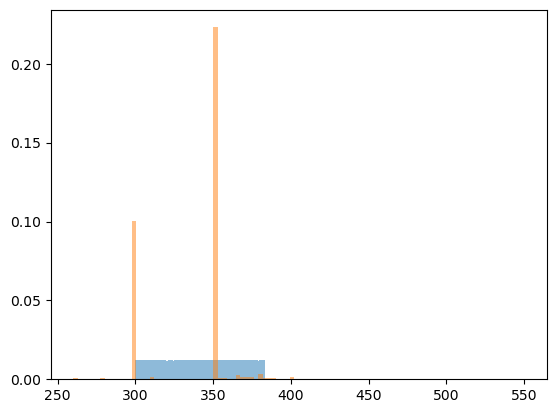

In [ ]:
import matplotlib.pyplot as plt

idx = 20
plt.hist(X_train.values[:, idx], bins=100, density=True, alpha=0.5)
plt.hist(X_test.values[:, idx], bins=100, density=True, alpha=0.5)

In [ ]:
print(X_train.columns[idx])
print(X_test.columns[idx])
print(X_train[X_train.columns[idx]])
print(X_test[X_test.columns[idx]])

CHAINSTAYbrdgshift
CHAINSTAYbrdgshift
0          300.000000
1          341.500000
2          305.187500
3          318.156250
4          380.406250
              ...    
1398145    302.837503
1398146    339.150003
1398147    328.775003
1398148    337.853128
1398149    379.353128
Name: CHAINSTAYbrdgshift, Length: 1398150, dtype: float64
1       350.0
2       350.0
3       350.0
4       350.0
5       350.0
        ...  
4796    350.0
4797    350.0
4798    350.0
4799    350.0
4800    350.0
Name: CHAINSTAYbrdgshift, Length: 4512, dtype: float64
